This code has been prouced as a teaching resource for the UKSA space software, data and AI course run by the Space South Central Universities.

Contributors to this code includes: B. Floyd; S. Youles; B. Canning

### Learning Outcome
<div class="alert alert-block alert-info"> 
<b>NOTE</b> In this notebook we will aim to understand how to define a simple model and the training loop for a Neural Network.  We will think about the data again at a later stage. 
Specifically we will:
    <li>Learn the components of a NN</li>
    <li>Learn the steps in training a model</li>
    <li>Learn how to choose the GPU or CPU for training</li>
</div>

## What is AI/ML and the theory of Neural Networks

**TASK:**
Below we will see how to build a NN model in PyTorch. Your task will be to build your own PyTorch model for thr fashionMNIST dataset.

### Artificial Intelligence, Machine Learning, and Neural Networks

Artificial intelligence (AI) is the field of research that involves methods to allow a machine to take input and make decisions based on that input. One of the methods used in this decision-making process is called "machine learning (ML)" where statistical models are used to process input data and perform tasks with this data without explict instructions. Neural networks (NN) are one such statistical model inspired by biological networks of neurons. Large scale, or 'deep', neural networks are referred to as 'deep learning (DL)'. 

![AI image](AI_ML_NN_DL.png)

### Basic ideas behind Neural Networks


In a neural network, a neuron can be thought of a container that holds a number (often between `0` and `1`) which indicates the strength of the "activation" of the neuron. A better description would be that neurons are functions that map inputs to a value indicating importance.

The neurons are connected with each other by weights that relate the association of neurons in one layer to neurons in another layer. 

A particular neuron's activation in the network is related to the wighted sum of all the activations of the neurons that connect to it proportional to the weight value connecting the neurons, $ w_{1} a_{1} + w_{2} a_{2} + \cdots + w_{n} a_{n} $. We also apply a function, called an 'actvation function' to the weighted sum to allow for non-liniarities (and sometimes to map between `0` and `1`). A commonly used activation function is a rectified linear unit, or `ReLU` for short. 

Additionally, if we want the activation of our neuron to be biased — for example, if we wanted the neuron to only meaningfully activate if the weighted sum is $> 10$—then we can add a bias term, $b_{i}$ to our weighted sum before applying our ReLU function.
$$a_{0}^{(1)} = \sigma\left(\sum\limits_{j=0}^{n} w_{0, j} a_{j}^{(0)} - b_0\right)$$
This can all actually just be organized as a matrix operation,
$$ \begin{bmatrix} a_{0}^{(1)} \\ a_{1}^{(1)} \\ \vdots \\ a_{n}^{(1)} \end{bmatrix} = \sigma\left(\begin{bmatrix} w_{0,0} & w_{0,1} & \cdots & w_{0,n} \\ w_{1,0} & w_{1,1} & \cdots & w_{1,n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{k,0} & w_{k,1} & \cdots & w_{k,n} \end{bmatrix} \begin{bmatrix} a_{0}^{(0)} \\ a_{1}^{(0)} \\ \vdots \\ a_{n}^{(0)} \end{bmatrix} + \begin{bmatrix} b_{0} \\ b_{1} \\ \vdots \\ b_{n} \end{bmatrix}\right)$$
Each layer in out network can be thought of as a series of matrix operations where our goal is to tune the values of the matrix elements in order to achieve a desired output based on some input data. This "training" process is where the neural network "learns" what values each matrix in the system needs to have in order to give the correct output.

When we train our network we randomly initilise the neuron weights and biases and guess at the answer - we then compare this answer to the 'truth' and 'backpropgate' our findings to update the weights and biases in the direction we belive will be a better guess. We run our model forward once more and compare the results again. This iteration goes on until we have reached our defined stopping criteria. 

The gifs below show this iterative process from a network and graphical view. 

<img src="Gif_1_crop.gif" width=500>
<img src="Gif_2_crop.gif" width=500>

### Machine Learning in Python

There are many different libraries in the Python ecosystem that provide machine learning methods. Some of the most popular are:
- [Scikit-learn](https://scikit-learn.org/stable/index.html)
- [TensorFlow](https://www.tensorflow.org/)
- [PyTorch](https://pytorch.org/)

We will also use several common libraries to help with managing or visualizing the data:
- [Numpy](https://numpy.org/)
- [Scipy](https://scipy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Pandas](https://pandas.pydata.org/)

While all the machine learning libraries can perform many of the same tasks, some libraries have strengths in certain tasks over each other. It's always a good idea to explore the different options for your use case to determine the right tool for the job.

Sckit-learn is a great entry point into machine learning, and it is a community-managed project based on Numpy and Scipy, also community-managed projects. It provides methods for many supervised and unsupervised learning algorithms with a simple API. We will explore this library in this notebook and later in the course as well.

TensorFlow is a powerful library developed and maintained by Google designed to work well on deep neural networks which have applications in a variety of complicated tasks. It uses tensors—multidimensional arrays similar to vectors and matrices—to represent the data and network.

PyTorch is one of the two most popular machine learning libraries (along with TensorFlow) in use today. It was originally developed by Meta but is now maintained as part of the Linux Foundation. Like TensorFlow, it operates on tensors and is useful for running deep neural networks on a variety of hardware setups. We will also look at this library in this notebook and throughout the course.

## AI/ML tools in Python
In this tutorial, we are going to explore how to build a simple neural network to try to identify some handwritten digits using PyTorch

Before we begin, we need to import a few libraries that will help us throughout our examples.

In [1]:
# !pip --quiet install torchvision

In [25]:
import matplotlib.pyplot as plt  # This library allows us to create and display plots which we can use to explore our data
import numpy as np  # This library helps with a variety of mathematical and array tasks
from torchvision import datasets  # This library is part of the PyTorch project but is useful in general for us to get our dataset
from torchvision.transforms import ToTensor
import sklearn.metrics as metrics

### Data Exploration
Our training dataset is going to be the [MNIST database of handwritten digits](https://yann.lecun.com/exdb/mnist/).

<div class="alert alert-block alert-warning">

In these examples, we are going to use simple neural networks to perform image classification. In practice, you will likely want to use more sophisticated techniques like [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) to do this type of task. However, in this notebook we are more interested in the anatomy of a NN and how to build one in python.

</div>

First we will import this well known datset using PyTorch. Documentation for the avalible PyTorch datasets are here: https://pytorch.org/vision/master/datasets.html

In [2]:
# This will download and create a dataset from the training set using a PyTorch module.
mnist_training = datasets.MNIST(root='./Resources', train=True, download=True, transform=ToTensor())

# We will later use this dataset to test our trained neural network with.
mnist_testing = datasets.MNIST(root='./Resources', train=False, download=True, transform=ToTensor())

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9912422/9912422 [00:01<00:00, 8828194.54it/s] 


Extracting ./Resources/MNIST/raw/train-images-idx3-ubyte.gz to ./Resources/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28881/28881 [00:00<00:00, 117265918.51it/s]


Extracting ./Resources/MNIST/raw/train-labels-idx1-ubyte.gz to ./Resources/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1648877/1648877 [00:00<00:00, 3411952.58it/s]


Extracting ./Resources/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Resources/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4542/4542 [00:00<00:00, 26869575.13it/s]

Extracting ./Resources/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Resources/MNIST/raw



We should always do some data exploration so that we know what our data looks like.

In [3]:
mnist_training

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Resources
    Split: Train
    StandardTransform
Transform: ToTensor()

Let's display the training data and the associated labels.

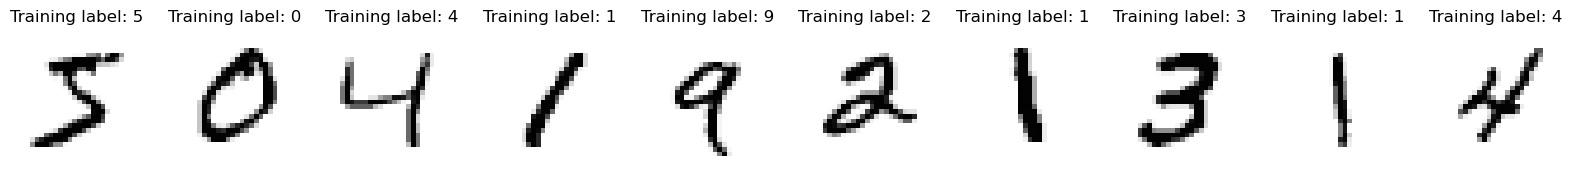

In [4]:
# We need to cast the data as Numpy arrays to use with Scikit-learn
training_images = mnist_training.data.numpy()
training_labels = mnist_training.targets.numpy()

# We will use the testing dataset later to see how our networks perform
testing_images = mnist_testing.data.numpy()
testing_labels = mnist_testing.targets.numpy()

fig, axes = plt.subplots(ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes.flatten(), training_images, training_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f'Training label: {label}')
plt.show()

We also should look at the frequencies of the training labels to assess how potentially biased the data we are going to train the networks on will be.

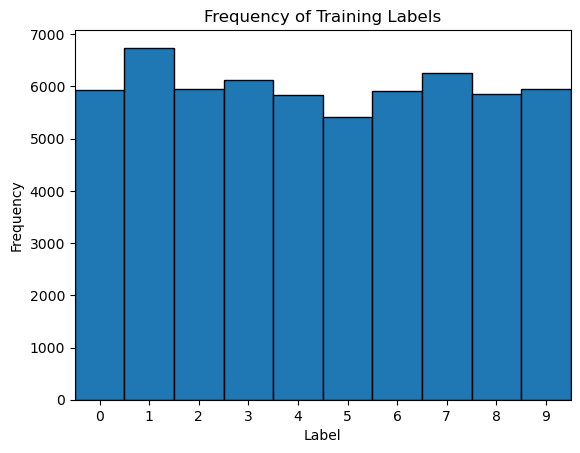

In [5]:
fig, ax = plt.subplots()
ax.hist(training_labels, bins=np.arange(11), align='left', edgecolor='black')
ax.set(title='Frequency of Training Labels', xlabel='Label', ylabel='Frequency', xlim=[-0.5, 9.5])
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

The above was using PyTorch - PyTorch is not the only place we could have gotten our datsets - the most common benchmarking datasets, and many of datasets and pretrained models are avlible through most packages. Forexample the sklearn version would have been:

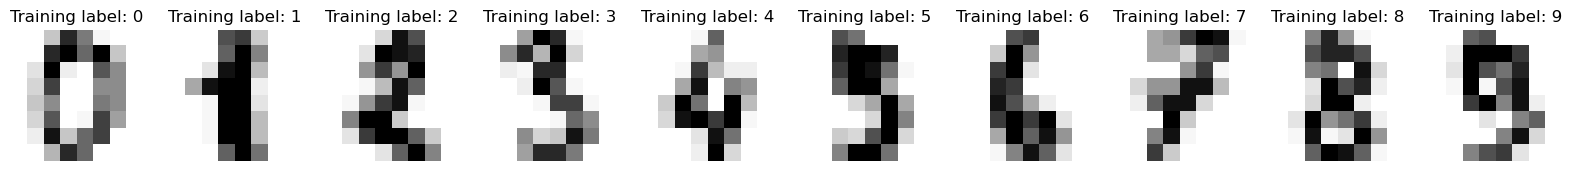

In [22]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets as sk_datasets
sk_digits = sk_datasets.load_digits()
fig, axes = plt.subplots(ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes.flatten(), sk_digits.images, sk_digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f'Training label: {label}')
plt.show()

## NN in PyTorch

Now using PyTorch, we will try to build a very simplistic neural network with 5 hidden layers of 16 neurons each. We will also specify that we are using a stochastic gradient descent method ('adam', the adaptive moment estimation) for our training of the network, we will use the rectified linear unit (ReLU) activation function that renormalizes the input for a neuron to specify the activity on the neuron. We will carry out 10,000 training iterations, and shuffle the data on each training epoch.

PyTorch provides an advanced API, allowing for us to target specific hardware to run our training on (so we can move toward deep learning with GPUs).  Moreover, instead of simply providing pre-constructed network options, PyTorch encourages us to define our own model explicitly. This allows us to have some finer control on how exactly we want to set up our network architecture, and it is a place to start when learning ML techniques as we define all the steps in our model and in its training. 

In [8]:
import torch
# We are importing two PyTorch submodules, `nn` provides the neural network methods to define the neural network while `optim` provides the optimizer methods which we will use to define how our training will be done.
from torch import nn, optim
# PyTorch wraps its data into an iterable that allows us to break up our data into "minibatches" as we are training and allows multiprocessing to be done easily.
from torch.utils.data import DataLoader

pyTorch uses a `DataLoader` class to wrap an iterable around the dataset. If we were providing our own dataset, we would use the `Dataset` class to store the samples first. However, we won't worry too much about these steps right now. 

In [9]:
train_loader = DataLoader(mnist_training, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_testing, batch_size=64, shuffle=True)

With PyTorch, we can directly target the hardware we have available so that we can run our network very efficiently.

In [10]:
device = (
    'cuda' if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu')
print(f'Using {device = }')

Using device = 'cuda'


### 1. A first NN model

Now we can get on to the part that we wish to learn - building and training our first NN model. 

To define a NN model we need to define:

1. Its building blocks
2. How to traverse the network

We will start with the simplest 'brute force' method of writing out our network.

PyTorch allows us to build the neural network layer by layer. Commonly (though it is not strictly required) this is done by defining a Python class. Here we will define:

1. An flattened input layer
2. 5 hidden layers of 16 neurons each
3. A ReLU normalization in between each of the linear layers

In [28]:
class MyFirstNeuralNet(nn.Module):
    """
    Our First NN - a straightforward approach.
    """

    def __init__(self):
        """This method defines the layers that make up our NN.
        """
        # super()__init__() Gives the torch.nn.Module class the ability to 
        # call our function
        super(MyFirstNeuralNet, self).__init__()

        # First, we will flatten our input data.
        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(784, 16) # This is our input layer
        self.activation = nn.ReLU() # our relu activation function
        self.linear2 = nn.Linear(16, 16) # our 16 neuron layers
        self.linear3 = nn.Linear(16, 10) # our output layer for numbers 0-9

    def forward(self, x):
        """This method does the forward pass operation in the network."""
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)        
        return x

That is all we need for our model.  

Now it has been defined, we can initialize it and print it out.

In [29]:
model = MyFirstNeuralNet().to(device)
print(model)

MyFirstNeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=30, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=30, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=10, bias=True)
)


### 2. How to train your dragon

The steps in training are formulaic:

* Put model into ‘train’ mode:  model.train()
* For each 'epoch' of training and ‘batch’ of data:
    1. Reset gradient to zero - incase not
    2. Predict outputs from inputs
    3. Calculate loss (and acuracy if we want to save it)
    4. Compute gradients using backpropagation
    5. Update parameters
    6. Go back to 1.
 
But, to calculate a 'loss' we need ot define an 'loss function' i.e. something to calculate a metic from such as a 'least squares' algorithm etc. 

We will also need to define an 'optimizer' to tell us how to step about in parameter space - e.g. what should the step-size be when we pick another random value, how far from the starting location can we move in one go?

In [30]:
# common loss function for classification tasks is the CrossEntropyLoss - see below
# common stochastic gradient descent optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# we will assume each batch is a bathc of one and therefore not define it right now
# we will train for only 5 epochs

In [31]:
model.train() # model is now in 'train' mode
for epoch in range(5):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad() #reset grdient to zero - 1.
        outputs = model(images) # predict outputs from inputs - 2.
        loss = nn.CrossEntropyLoss()(outputs, labels) # calculate loss - 3.
        loss.backward() # compute gradients using backpropagation - 4.
        optimizer.step() # update parameters - 5. 
        # for loop takes us back to 1.

Now that our model has been trained, we can test it by evaluating our testing data

In [37]:
model.eval()
with torch.no_grad():
    predictions = model(torch.as_tensor(testing_images, dtype=torch.float).to(device))

In [38]:
predictions

tensor([[-4000.1074,   346.4716,  1121.8673,  ...,  2611.4043,  -890.7556,
           -39.1389],
        [-3222.8269,  -653.3060,  1368.3779,  ...,  -707.1584,     7.5384,
         -2817.3657],
        [-2604.6348,  1189.5980,   443.2875,  ...,    -8.2330,   235.3834,
         -1106.3052],
        ...,
        [-3912.6484, -1228.2621,   344.6733,  ...,   403.4208,  -106.0047,
          -118.5272],
        [-2635.5115, -1717.7285, -2161.8423,  ..., -1876.3380,    28.4120,
            -5.5725],
        [-2047.3667, -2545.4158,   416.9637,  ..., -2907.0930,  -151.6096,
         -4196.6123]], device='cuda:0')

Looking at some of our results. One thing to note about this PyTorch output is that the `predictions` object contains all the probabilities of the possible outputs. If we want to see the most likely output, we will need to take the maximum probable result. (Or add another activation function suchn as a sigmoid to the output layer of our neural network).

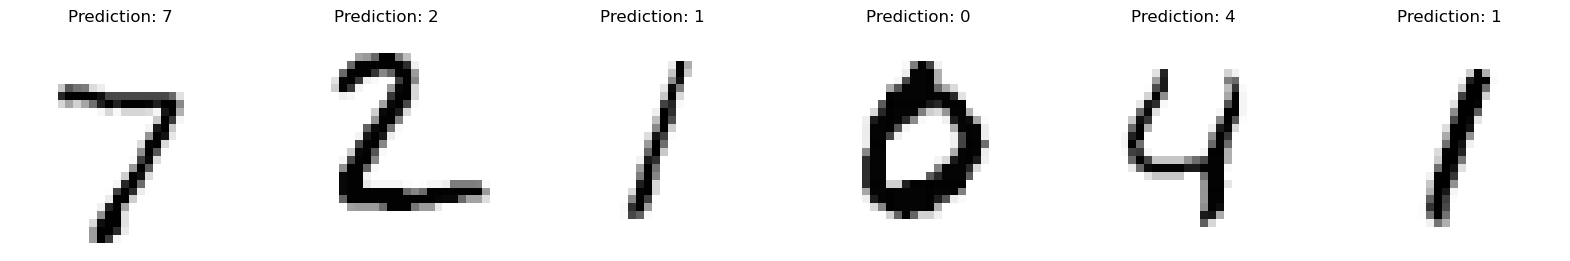

In [39]:
most_likely_output = predictions.data.max(dim=1)[1].cpu().numpy()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,3))
for ax, image, prediction in zip(axes.flatten(), testing_images, most_likely_output):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f"Prediction: {prediction}")
plt.show()

### 3. Viewing the results

Below we will simply show a couple of methods of viewing results in a tablified of figure format. 

A key method here is missing but we will wait till the majinally more advanced method to show it. 

1. The `classification_report` function from scikit-learn 
2. The confusion matrix of our PyTorch results

In [40]:
print(f'Classification report for PyTorch Model:\n{metrics.classification_report(testing_labels, most_likely_output)}')


Classification report for PyTorch Model:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.89      0.96      0.92      1032
           3       0.83      0.96      0.89      1010
           4       0.97      0.89      0.93       982
           5       0.99      0.75      0.86       892
           6       0.93      0.98      0.96       958
           7       0.90      0.96      0.93      1028
           8       0.89      0.94      0.91       974
           9       0.97      0.87      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



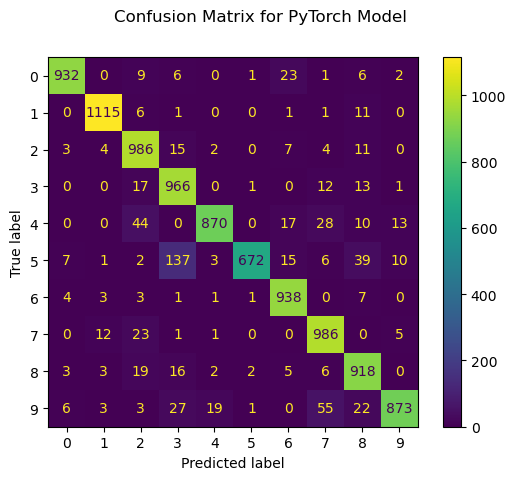

In [41]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(testing_labels, most_likely_output)
disp.figure_.suptitle('Confusion Matrix for PyTorch Model')
plt.show()

<div class="alert alert-block alert-success"> 
 <strong>Exercises</strong>
 <br>
 Try to change some things in both the model and the training (one-by-one) and observe how the results change. 
 <br><br>
 Hyperparameters of the model to try to change include:
 <br>
 <li> Number of neurons in your hidden layers</li>
 <li> Number of hidden layers</li>
 <li> Activation function: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity </li>
 <br>
 Hyperparameters of the training to try to change include:
 <br>
 <li> Number of epochs</li>
 <li> Loss function</li>
 <li> Optimizer and/or learning rate and/or step size</li>
</div>